## Step 1: Import the necessary packages


In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

## Step 2: Read in the blocking_ab_image_data excel/csv file as a dataframe using pandas

In [2]:
file = pd.read_csv('Blocking_Ab_Exp_Image_data.csv')
output_df = pd.DataFrame(file)
output_df = output_df.loc[:, ~output_df.columns.str.contains('^Unnamed')]

output_df

,Image,label,area,mean,StdDev,Min,Max,IntDen,RawIntDen,Cell
0,1,B01_1_MIP.czi:c:4/4 - B01_1_MIP.czi #1,2614.994,128.494,88.779,44,1426,336010.922,6520812,1
1,2,B01_1_MIP.czi:c:3/4 - B01_1_MIP.czi #1,2614.994,209.618,162.908,71,1837,548149.992,10637699,1
2,3,B01_1_MIP.czi:c:2/4 - B01_1_MIP.czi #1,2614.994,184.399,135.956,82,3419,482202.095,9357878,1
3,4,B01_1_MIP.czi:c:4/4 - B01_1_MIP.czi #1,4043.275,152.420,133.390,0,2396,616274.937,11959769,2
4,5,B01_1_MIP.czi:c:3/4 - B01_1_MIP.czi #1,4043.275,220.644,189.774,0,2430,892122.608,17313020,2
...,...,...,...,...,...,...,...,...,...,...
979,241,B32_3_MIP.czi:c:3/4 - B32_3_MIP.czi #1,2024.162,361.739,311.244,82,3410,732218.485,14209833,3
980,242,B32_3_MIP.czi:c:2/4 - B32_3_MIP.czi #1,2024.162,137.604,91.003,60,2734,278533.517,5405374,3
981,243,B32_3_MIP.czi:c:4/4 - B32_3_MIP.czi #1,2678.220,115.173,107.662,27,1897,308457.541,5986096,4
982,244,B32_3_MIP.czi:c:3/4 - B32_3_MIP.czi #1,2678.220,275.506,232.382,75,2607,737866.578,14319443,4


## Step 3: Make new columns and fill them with information for the following 3 variables:


In [3]:
image_id = []
channel = []
animal_id = []

#what information should go in each column?
#animal id vs. image id?

for i in output_df.index:
    animal_id = np.append(animal_id, output_df["label"][i].split('_')[0])
    channel = np.append(channel, output_df["label"][i].split("-")[0][-4:-1])
    image_id = np.append(image_id, output_df["label"][i].split("_")[1])

output_df["animal_id"] = animal_id
output_df["channel"] = channel
output_df["image_id"] = image_id

output_df

,Image,label,area,mean,StdDev,Min,Max,IntDen,RawIntDen,Cell,animal_id,channel,image_id
0,1,B01_1_MIP.czi:c:4/4 - B01_1_MIP.czi #1,2614.994,128.494,88.779,44,1426,336010.922,6520812,1,B01,4/4,1
1,2,B01_1_MIP.czi:c:3/4 - B01_1_MIP.czi #1,2614.994,209.618,162.908,71,1837,548149.992,10637699,1,B01,3/4,1
2,3,B01_1_MIP.czi:c:2/4 - B01_1_MIP.czi #1,2614.994,184.399,135.956,82,3419,482202.095,9357878,1,B01,2/4,1
3,4,B01_1_MIP.czi:c:4/4 - B01_1_MIP.czi #1,4043.275,152.420,133.390,0,2396,616274.937,11959769,2,B01,4/4,1
4,5,B01_1_MIP.czi:c:3/4 - B01_1_MIP.czi #1,4043.275,220.644,189.774,0,2430,892122.608,17313020,2,B01,3/4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,241,B32_3_MIP.czi:c:3/4 - B32_3_MIP.czi #1,2024.162,361.739,311.244,82,3410,732218.485,14209833,3,B32,3/4,3
980,242,B32_3_MIP.czi:c:2/4 - B32_3_MIP.czi #1,2024.162,137.604,91.003,60,2734,278533.517,5405374,3,B32,2/4,3
981,243,B32_3_MIP.czi:c:4/4 - B32_3_MIP.czi #1,2678.220,115.173,107.662,27,1897,308457.541,5986096,4,B32,4/4,3
982,244,B32_3_MIP.czi:c:3/4 - B32_3_MIP.czi #1,2678.220,275.506,232.382,75,2607,737866.578,14319443,4,B32,3/4,3


## Step 4: Create a new column "norm_mean" that is the mean column divided by the area column

In [4]:
norm_mean = []

for i in output_df.index:
    mean_float = float(output_df["mean"][i])
    area_float = float(output_df["area"][i])
    norm_mean = np.append(norm_mean, mean_float/area_float)

output_df["norm_mean"] = norm_mean
output_df

,Image,label,area,mean,StdDev,Min,Max,IntDen,RawIntDen,Cell,animal_id,channel,image_id,norm_mean
0,1,B01_1_MIP.czi:c:4/4 - B01_1_MIP.czi #1,2614.994,128.494,88.779,44,1426,336010.922,6520812,1,B01,4/4,1,0.049137
1,2,B01_1_MIP.czi:c:3/4 - B01_1_MIP.czi #1,2614.994,209.618,162.908,71,1837,548149.992,10637699,1,B01,3/4,1,0.080160
2,3,B01_1_MIP.czi:c:2/4 - B01_1_MIP.czi #1,2614.994,184.399,135.956,82,3419,482202.095,9357878,1,B01,2/4,1,0.070516
3,4,B01_1_MIP.czi:c:4/4 - B01_1_MIP.czi #1,4043.275,152.420,133.390,0,2396,616274.937,11959769,2,B01,4/4,1,0.037697
4,5,B01_1_MIP.czi:c:3/4 - B01_1_MIP.czi #1,4043.275,220.644,189.774,0,2430,892122.608,17313020,2,B01,3/4,1,0.054571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,241,B32_3_MIP.czi:c:3/4 - B32_3_MIP.czi #1,2024.162,361.739,311.244,82,3410,732218.485,14209833,3,B32,3/4,3,0.178710
980,242,B32_3_MIP.czi:c:2/4 - B32_3_MIP.czi #1,2024.162,137.604,91.003,60,2734,278533.517,5405374,3,B32,2/4,3,0.067981
981,243,B32_3_MIP.czi:c:4/4 - B32_3_MIP.czi #1,2678.220,115.173,107.662,27,1897,308457.541,5986096,4,B32,4/4,3,0.043004
982,244,B32_3_MIP.czi:c:3/4 - B32_3_MIP.czi #1,2678.220,275.506,232.382,75,2607,737866.578,14319443,4,B32,3/4,3,0.102869


## Step 5: Create separate dataframes for each channel 
(tmem_df is channel 3, iba1_df is channel 4, and cd68_df is channel 2)

In [5]:
tmem_df = output_df[output_df['channel'] == '3/4']
cd68_df = output_df[output_df['channel'] == '2/4']
iba1_df = output_df[output_df['channel'] == '4/4']

## Step 6: Create a normalized mean column in the tmem df and cd68 df by subtracting the iba1 value from relevant channel's values 

In [6]:
norm_mean_tmem = []
norm_mean_cd68 = []

for i in range(0, len(output_df), 3):
    iba1_mean = float(output_df["norm_mean"][i])
    tmem_mean = float(output_df["norm_mean"][i+1])
    cd68_mean = float(output_df["norm_mean"][i+2])
    norm_mean_tmem = np.append(norm_mean_tmem, tmem_mean - iba1_mean)
    norm_mean_cd68 = np.append(norm_mean_cd68, cd68_mean - iba1_mean)

tmem_df["norm_mean_tmem"] = norm_mean_tmem
cd68_df["norm_mean_cd68"] = norm_mean_cd68

c:\ProgramData\PyMOL\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
c:\ProgramData\PyMOL\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


## Step 7: Combine the tmem df and cd68 into a master final dataframe

In [7]:
tmem_df = tmem_df.reset_index()
tmem_df['norm_mean_cd68'] = cd68_df.reset_index()['norm_mean_cd68']

In [8]:
merged_df = tmem_df

In [9]:
merged_df = merged_df[['label', 'animal_id', 'Cell', 'image_id', 'norm_mean_tmem', 'norm_mean_cd68']]

In [10]:
merged_df

,label,animal_id,Cell,image_id,norm_mean_tmem,norm_mean_cd68
0,B01_1_MIP.czi:c:3/4 - B01_1_MIP.czi #1,B01,1,1,0.031023,0.021379
1,B01_1_MIP.czi:c:3/4 - B01_1_MIP.czi #1,B01,2,1,0.016873,0.006129
2,B01_1_MIP.czi:c:3/4 - B01_1_MIP.czi #1,B01,3,1,0.026970,0.014696
3,B01_1_MIP.czi:c:3/4 - B01_1_MIP.czi #1,B01,4,1,0.023199,0.020811
4,B01_2_MIP.czi:c:3/4 - B01_2_MIP.czi #1,B01,1,2,-0.000464,0.010045
...,...,...,...,...,...,...
323,B32_2_MIP.czi:c:3/4 - B32_2_MIP.czi #1,B32,4,2,0.074341,0.007211
324,B32_3_MIP.czi:c:3/4 - B32_3_MIP.czi #1,B32,1,3,0.060793,0.007608
325,B32_3_MIP.czi:c:3/4 - B32_3_MIP.czi #1,B32,2,3,0.070164,-0.000547
326,B32_3_MIP.czi:c:3/4 - B32_3_MIP.czi #1,B32,3,3,0.115084,0.004354


## Step 8: Identifying the range of values for a given channel (tmem or cd68)

(array([ 2.,  5.,  8., 17., 30., 23., 23., 26., 22., 19., 10., 15., 19.,
        13., 12., 11.,  6.,  9., 10.,  2.,  6.,  6.,  2.,  1.,  0.,  3.,
         4.,  2.,  4.,  0.,  4.,  0.,  1.,  0.,  3.,  1.,  2.,  0.,  1.,
         0.,  0.,  0.,  2.,  1.,  1.,  1.,  0.,  0.,  0.,  1.]),
 array([-0.01747098, -0.00791703,  0.00163693,  0.01119088,  0.02074483,
         0.03029879,  0.03985274,  0.0494067 ,  0.05896065,  0.0685146 ,
         0.07806856,  0.08762251,  0.09717646,  0.10673042,  0.11628437,
         0.12583832,  0.13539228,  0.14494623,  0.15450019,  0.16405414,
         0.17360809,  0.18316205,  0.192716  ,  0.20226995,  0.21182391,
         0.22137786,  0.23093181,  0.24048577,  0.25003972,  0.25959368,
         0.26914763,  0.27870158,  0.28825554,  0.29780949,  0.30736344,
         0.3169174 ,  0.32647135,  0.3360253 ,  0.34557926,  0.35513321,
         0.36468717,  0.37424112,  0.38379507,  0.39334903,  0.40290298,
         0.41245693,  0.42201089,  0.43156484,  0.44111879,

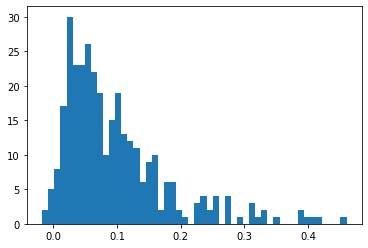

In [11]:
## plotting a histogram of tmem column and then also of cd68 column
plt.hist(merged_df["norm_mean_tmem"], bins = 50)

## choose values that will give us a good distribution of tmem hi/mid/low cells
## and then also for cd68

(array([ 1.,  0.,  0.,  1.,  0.,  1.,  2.,  4.,  3.,  5.,  7.,  2.,  8.,
         6.,  8., 10., 17., 12., 20., 32., 36., 31., 34., 18., 19.,  5.,
         8.,  5.,  3.,  3.,  5.,  2.,  3.,  1.,  1.,  5.,  1.,  1.,  2.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,  1.]),
 array([-0.10436067, -0.09924867, -0.09413666, -0.08902466, -0.08391266,
        -0.07880065, -0.07368865, -0.06857665, -0.06346464, -0.05835264,
        -0.05324064, -0.04812863, -0.04301663, -0.03790463, -0.03279262,
        -0.02768062, -0.02256862, -0.01745661, -0.01234461, -0.00723261,
        -0.0021206 ,  0.0029914 ,  0.0081034 ,  0.01321541,  0.01832741,
         0.02343941,  0.02855142,  0.03366342,  0.03877542,  0.04388743,
         0.04899943,  0.05411143,  0.05922344,  0.06433544,  0.06944744,
         0.07455945,  0.07967145,  0.08478345,  0.08989546,  0.09500746,
         0.10011946,  0.10523147,  0.11034347,  0.11545547,  0.12056748,
         0.12567948,  0.13079148,  0.13590349,  0.14101549,

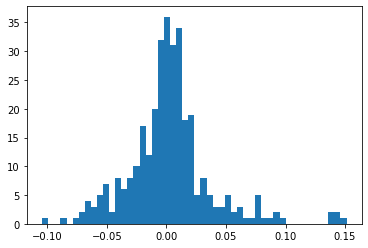

In [12]:
plt.hist(merged_df["norm_mean_cd68"], bins = 50)

## Step 9: Loop through the merged df and assign a cell a value for tmem and cd68

In [13]:
## NEW column in merged df which will contain a "string" that is either "high", "mid", or "low"

tmem_level = []
cd68_level = []

for i in merged_df.index:
    if merged_df['norm_mean_tmem'][i] < 0.05:
        tmem_level_value = "low"
    elif merged_df['norm_mean_tmem'][i] > 0.11:
        tmem_level_value = "high"
    else:
        tmem_level_value = "mid"
    if merged_df['norm_mean_cd68'][i] < -0.007:
        cd68_level_value = "low"
    elif merged_df['norm_mean_cd68'][i] > 0.01:
        cd68_level_value = "high"
    else:
        cd68_level_value = "mid"
    tmem_level = np.append(tmem_level, tmem_level_value)
    cd68_level = np.append(cd68_level, cd68_level_value)

merged_df["tmem_level"] = tmem_level
merged_df["cd68_level"] = cd68_level

c:\ProgramData\PyMOL\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\ProgramData\PyMOL\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# DOUBLE CHECK YOUR DISTRIBUTIONS

In [14]:
np.unique(merged_df['tmem_level'],return_counts = True)

(array(['high', 'low', 'mid'], dtype=object),
 array([103, 112, 113], dtype=int64))

In [15]:
np.unique(merged_df['cd68_level'],return_counts = True)

(array(['high', 'low', 'mid'], dtype=object),
 array([112, 109, 107], dtype=int64))

### Step 10: Import sample metadata

In [16]:
## bring in the sample_metadata.csv file as a pandas dataframe

metadata_df = pd.read_csv('sample_metadata.csv')

metadata_df

,Breeder ID,Animal ID,Age,Section Key,Breeder ID.1,Animal ID.1,Sex,Age.1,Date of Surgery,Ab,animal_id
0,W(26),F3,P17,B07,W(26),F3,Female,P15,12/8/2022,a-CSF1,B07
1,W(22),F3,P17,B11,W(22),F3,Female,P15,12/18/2022,a-CSF1,B11
2,W(28),F1.1,P17,B24,W(28),F1,Female,P15,1/11/2023,a-CSF1,B24
3,W(25),F1.1,P17,B26,W(25)-3,F1,Female,P15,1/10/2023,a-CSF1,B26
4,W(25),F2.1,P17,B30,W(25)-3,F2,Female,P15,1/10/2023,a-CSF1,B30
5,W(22),F2,P17,B02,W(22),F2,Female,P15,12/18/2022,a-gp120,B02
6,W(22),F1,P17,B12,W(22),F1,Female,P15,12/18/2022,a-gp120,B12
7,W(26),F1,P17,B23,W(26),F1,Female,P15,12/8/2022,a-gp120,B23
8,W(28),F3.1,P17,B27,W(28),F3,Female,P15,1/11/2023,a-gp120,B27
9,W(25),F4.1,P17,B29,W(25)-3,F4,Female,P15,1/10/2023,a-gp120,B29


## Step 11: Calculate the percentage of cells that are tmem high, cd68 low in every animal

In [17]:
group_animal_id = merged_df.groupby("animal_id")

group_animal_id.get_group("B04")

,label,animal_id,Cell,image_id,norm_mean_tmem,norm_mean_cd68,tmem_level,cd68_level
36,B04_1_MIP.czi:c:3/4 - B04_1_MIP.czi #1,B04,1,1,0.250451,0.021375,high,high
37,B04_1_MIP.czi:c:3/4 - B04_1_MIP.czi #1,B04,2,1,0.326751,-0.005140,high,mid
38,B04_1_MIP.czi:c:3/4 - B04_1_MIP.czi #1,B04,3,1,0.237388,-0.028827,high,low
39,B04_1_MIP.czi:c:3/4 - B04_1_MIP.czi #1,B04,4,1,0.179878,-0.010777,high,low
40,B04_2_MIP.czi:c:3/4 - B04_2_MIP.czi #1,B04,1,2,0.252247,-0.019754,high,low
41,B04_2_MIP.czi:c:3/4 - B04_2_MIP.czi #1,B04,2,2,0.182596,-0.014261,high,low
42,B04_2_MIP.czi:c:3/4 - B04_2_MIP.czi #1,B04,3,2,0.460227,0.000710,high,mid
43,B04_2_MIP.czi:c:3/4 - B04_2_MIP.czi #1,B04,4,2,0.255388,0.012783,high,high
44,B04_3_MIP.czi:c:3/4 - B04_3_MIP.czi #1,B04,1,3,0.124979,-0.010730,high,low
45,B04_3_MIP.czi:c:3/4 - B04_3_MIP.czi #1,B04,2,3,0.113055,-0.008263,high,low


In [25]:
raw_final_df = pd.merge(merged_df, metadata_df, on='animal_id')

raw_final_df.to_csv('raw_combined_data.csv')

(array([ 6., 26., 40., 22., 12.,  6.,  9.,  2.,  2.,  3.]),
 array([-0.01747098,  0.00323268,  0.02393633,  0.04463999,  0.06534364,
         0.0860473 ,  0.10675095,  0.12745461,  0.14815827,  0.16886192,
         0.18956558]),
 <a list of 10 Patch objects>)

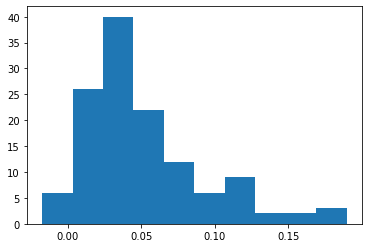

In [23]:
plt.hist(raw_final_df[raw_final_df['Ab'] == 'a-IL34']['norm_mean_tmem'])

(array([12., 34., 26., 17.,  6.,  8.,  4.,  3.,  4.,  2.]),
 array([3.32196453e-04, 4.63216470e-02, 9.23110975e-02, 1.38300548e-01,
        1.84289999e-01, 2.30279449e-01, 2.76268900e-01, 3.22258350e-01,
        3.68247801e-01, 4.14237251e-01, 4.60226702e-01]),
 <a list of 10 Patch objects>)

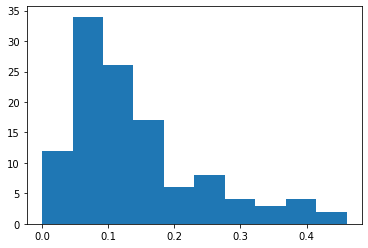

In [24]:
plt.hist(raw_final_df[raw_final_df['Ab'] == 'a-gp120']['norm_mean_tmem'])

In [19]:
total = []
count = []
perc_df = []
data = []

for x in group_animal_id:  
    #print(x[1])
    #print(np.unique(x[1]['tmem_level'],return_counts = True)[1][0])
    #inter_df = x[1][x[1]['tmem_level'] == 'high']["cd68_level"]
    x1_df = x[1].reset_index()
    inter_df = x[1][x[1]['tmem_level'] == 'high']
    inter_df_2 = x[1][x[1]['tmem_level'] == 'low']
    total = len(x[1])
    count = len(inter_df[inter_df['cd68_level'] == 'low'])
    count2 = len(inter_df_2[inter_df_2['cd68_level'] == 'high'])
    x = [x1_df['animal_id'][0], count/total*100, count2/total*100]
    data.append(x)

perc_df = pd.DataFrame(data, columns=['animal_id', 'tmem_high_cd68_low', 'tmem_low_cd68_high'])
print(perc_df)


   animal_id  tmem_high_cd68_low  tmem_low_cd68_high
0        B01            0.000000           41.666667
1        B02            0.000000            0.000000
2        B03            0.000000           41.666667
3        B04           66.666667            0.000000
4        B06            0.000000           25.000000
5        B08            0.000000           41.666667
6        B09            8.333333            0.000000
7        B10            0.000000           25.000000
8        B11            0.000000            0.000000
9        B12           58.333333            0.000000
10       B13            0.000000            0.000000
11       B14            0.000000            8.333333
12       B15            0.000000           83.333333
13       B16            0.000000            8.333333
14       B17            0.000000           25.000000
15       B19            0.000000           33.333333
16       B20           16.666667            8.333333
17       B21           16.666667            8.

## Step 12: Join sample metadata with merged df

In [20]:
## easy to merge by animal_id

final_df = pd.merge(perc_df, metadata_df, on='animal_id')

In [21]:
final_df

,animal_id,tmem_high_cd68_low,tmem_low_cd68_high,Breeder ID,Animal ID,Age,Section Key,Breeder ID.1,Animal ID.1,Sex,Age.1,Date of Surgery,Ab
0,B01,0.000000,41.666667,W(26),F2,P17,B01,W(26),F2,Female,P15,12/8/2022,a-IL34
1,B02,0.000000,0.000000,W(22),F2,P17,B02,W(22),F2,Female,P15,12/18/2022,a-gp120
2,B03,0.000000,41.666667,W(25),M4,P17,B03,W(25),M4,Male,P15,12/10/2022,a-IL34
3,B04,66.666667,0.000000,W(26),M1,P17,B04,W(26),M1,Male,P15,12/8/2022,a-gp120
4,B06,0.000000,25.000000,W(26),M3,P17,B06,W(26),M3,Male,P15,12/8/2022,a-CSF1
5,B08,0.000000,41.666667,W(22),M3,P17,B08,W(22),M3,Male,P15,12/18/2022,a-IL34
6,B09,8.333333,0.000000,W(27),M2,P17,B09,W(27),M2,Male,P15,12/20/2022,a-IL34
7,B10,0.000000,25.000000,W(25),F1,P17,B10,W(25),F1,Female,P15,12/10/2022,a-IL34
8,B11,0.000000,0.000000,W(22),F3,P17,B11,W(22),F3,Female,P15,12/18/2022,a-CSF1
9,B12,58.333333,0.000000,W(22),F1,P17,B12,W(22),F1,Female,P15,12/18/2022,a-gp120
